In [2]:
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn tqdm

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

C:\Users\Tanuja\Desktop\Jupyter Notebook\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
boston = tf.keras.datasets.boston_housing

In [5]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [6]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)


In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [9]:
scaler = StandardScaler()

In [10]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

In [13]:
!pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/b0/5f/1ebfd430df05c4f9e438dd3313c4456eab937d976f6ab8ce81a98f9fb381/pydot-3.0.4-py3-none-any.whl.metadata


In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [18]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 573.8492 - mae: 22.1465 - val_loss: 2090.8311 - val_mae: 42.4749
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 546.2609 - mae: 22.0155 - val_loss: 873.1755 - val_mae: 27.9451
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 537.5214 - mae: 21.8175 - val_loss: 569.5283 - val_mae: 22.5245
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 550.2800 - mae: 22.0194 - val_loss: 880.8107 - val_mae: 28.5316
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 460.3893 - mae: 20.2587 - val_loss: 543.6170 - val_mae: 22.3469
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 391.8948 - mae: 18.5742 - val_loss: 499.6818 - val_mae: 21.4553
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 295.3847 - mae: 16.1942 - val_loss: 303.1223 - val_mae: 16.4811
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 221.6958 - mae: 13.7641 - val_loss: 448.6037 - val_mae: 20.4285
Epoch 9/20
13/1

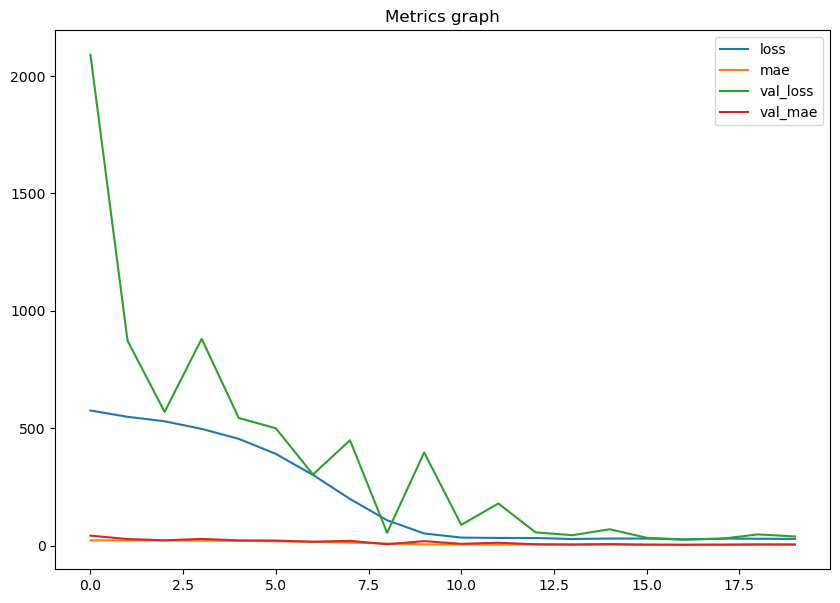

In [19]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [20]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


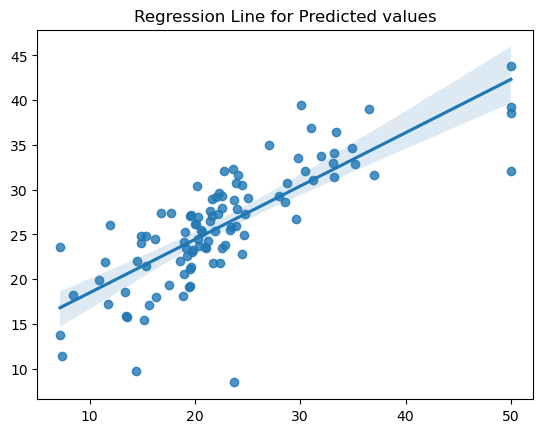

In [21]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [22]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [23]:
regression_metrics_display(y_test, y_pred)

MAE is 4.988279056549072
MSE is 39.00584843121883
R2 score is 0.4521805285336683
